In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pgmpy.models import BayesianNetwork

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('kdsf.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kodam Street Food Surabaya
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,0,0,1,0
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [3]:
drop_list = ['Aktivitas Wisata', 'Nama Wisata']

train_wisata = train.drop(columns=drop_list)
train_wisata

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kodam Street Food Surabaya
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,0,0,1,0
2,1,1,1,1,1,1,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
3,1,0,1,1,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,0,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
5,1,1,1,1,0,1,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1,0,1,1,0,1,1,1,0,0,...,0,1,1,0,1,0,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1348,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [4]:
dfhot_train, dfnum_train = bn.df2onehot(train_wisata)



[df2onehot] >Auto detecting dtypes.


100%|██████████| 24/24 [00:00<00:00, 154.21it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 284.75it/s]

[df2onehot] >Total onehot features: 48


In [5]:
dfnum_target = dfnum_train.pop('Kodam Street Food Surabaya')
dfnum_target

0       0
1       0
2       0
3       0
4       0
       ..
1345    0
1346    0
1347    0
1348    0
1349    0
Name: Kodam Street Food Surabaya, Length: 1350, dtype: int32

In [6]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')
dfnum

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Kodam Street Food Surabaya
1118,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,1,0
642,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
687,1,1,0,1,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
322,1,0,1,1,1,0,1,0,1,1,...,1,0,0,0,1,0,0,1,1,0
326,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
835,1,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1216,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
559,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,1,0


In [7]:
edges = [
    ('Escape', 'Kodam Street Food Surabaya'),
    ('Relaxation', 'Kodam Street Food Surabaya'),
    ('Play', 'Kodam Street Food Surabaya'),
    ('Strenghthening family bonds', 'Kodam Street Food Surabaya'),
    ('Prestige', 'Kodam Street Food Surabaya'),
    ('Social Interaction', 'Kodam Street Food Surabaya'),
    ('Romance', 'Kodam Street Food Surabaya'),
    ('Educational Opportunity', 'Kodam Street Food Surabaya'),
    ('Self-fulfilment', 'Kodam Street Food Surabaya'),
    ('Wish-fulfiment', 'Kodam Street Food Surabaya'),
    ('Lingkungan', 'Kodam Street Food Surabaya'),
    ('Infrastruktur', 'Kodam Street Food Surabaya'),
    ('Fasilitas', 'Kodam Street Food Surabaya'),
    ('Akomodasi', 'Kodam Street Food Surabaya'),
    ('Kodam Street Food Surabaya', 'Makan Bersama'),
    ('Kodam Street Food Surabaya', 'Berolahraga'),
    ('Kodam Street Food Surabaya', 'Belajar'),
    ('Kodam Street Food Surabaya', 'Berinteraksi dengan satwa'),
    ('Kodam Street Food Surabaya', 'Mengambil Foto'),
    ('Kodam Street Food Surabaya', 'Beribadah'),
    ('Kodam Street Food Surabaya', 'Berkemah'),
    ('Kodam Street Food Surabaya', 'Melihat Pemandangan'),
    ('Kodam Street Food Surabaya', 'Berbelanja')
]

In [8]:
params_static = {
    'figsize': (15, 10),
    'width': 20,  # Menyesuaikan lebar panah
    'edge_alpha': 0.5,  # Menyesuaikan kejelasan panah
    'arrowstyle': '-|>',  # Gaya panah (ubah sesuai kebutuhan)
    'arrowsize': 20,  # Ukuran panah
    'minscale': 5,
    'maxscale': 15,
    'layout': 'spring_layout',
    'font_size': 14,
    'font_family': 'sans-serif',
    'alpha': 0.8,
    'node_shape': 'o',
    'font_color': '#000000',
    'facecolor': 'white',
    'visible': True
}

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


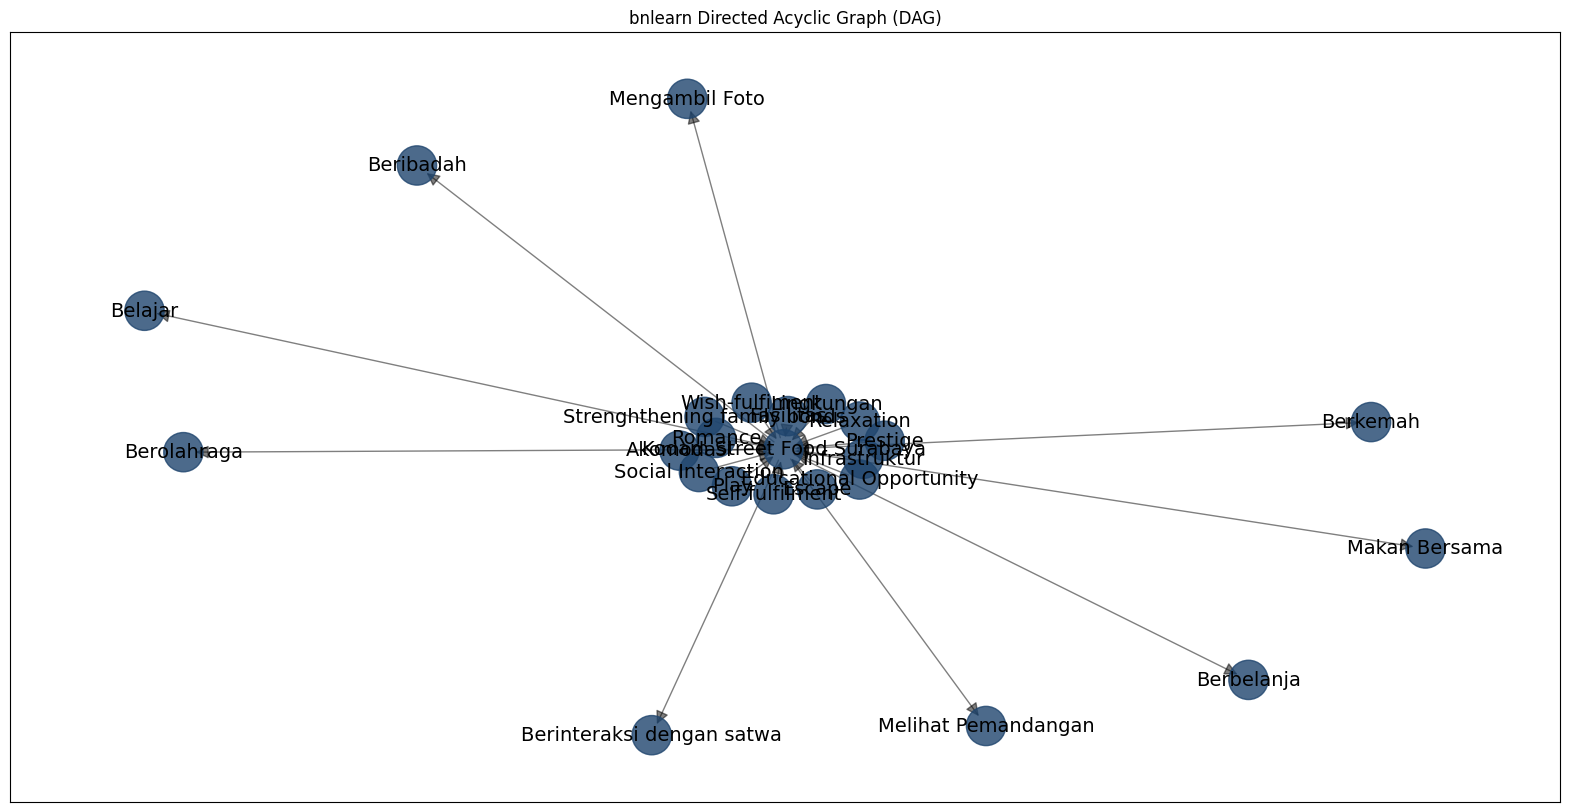

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Escape:
+-----------+----------+
| Escape(0) | 0.299038 |
+-----------+----------+
| Escape(1) | 0.700962 |
+-----------+----------+
[bnlearn] >CPD of Kodam Street Food Surabaya:
+-------------------------------+-----+--------------------------------+
| Akomodasi                     | ... | Akomodasi(1)                   |
+-------------------------------+-----+--------------------------------+
| Educational Opportunity       | ... | Educational Opportunity(1)     |
+-------------------------------+-----+--------------------------------+
| Escape                        | ... | Escape(1)                      |
+-------------------------------+-----+--------------------------------+
| Fasilitas                     | ... | Fasilitas(1)                   |
+-------------------------------+-----+--------------------------------+
| Infrastruktur                 | ... | Infrastruktur(1)               |
+------

In [9]:
DAG = bn.make_DAG(edges, verbose=0)


bn.print_CPD(DAG)


# Plot
G = bn.plot(DAG, interactive=False, params_static=params_static)


# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum, verbose=3);



In [10]:
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

In [11]:
get_acc(model, valid, 'Kodam Street Food Surabaya')

[bnlearn]> Remaining columns for inference: 23


  0%|          | 0/254 [00:00<?, ?it/s]

  6%|▌         | 15/254 [00:00<00:01, 146.66it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9661 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0339 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9924 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0076 |
+-------------------------------+-----------------------------------+
+-------------------

 17%|█▋        | 43/254 [00:00<00:01, 107.86it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9203 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0797 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.8237 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.1763 |
+-------------------------------+-----------------------------------+
+-------------------

 31%|███       | 78/254 [00:00<00:01, 144.37it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9931 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0069 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9937 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0063 |
+-------------------------------+-----------------------------------+
+-------------------

 37%|███▋      | 94/254 [00:00<00:01, 144.16it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9983 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0017 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.8795 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.1205 |
+-------------------------------+-----------------------------------+
+-------------------

 49%|████▉     | 124/254 [00:00<00:00, 133.42it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9984 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0016 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7514 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2486 |
+-------------------------------+-----------------------------------+
+-------------------

 60%|█████▉    | 152/254 [00:01<00:00, 124.48it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9378 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0622 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9993 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0007 |
+-------------------------------+-----------------------------------+
+-------------------

 74%|███████▍  | 188/254 [00:01<00:00, 148.45it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9974 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0026 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9997 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0003 |
+-------------------------------+-----------------------------------+
+-------------------

 88%|████████▊ | 224/254 [00:01<00:00, 162.99it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9987 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0013 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9995 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0005 |
+-------------------------------+-----------------------------------+
+-------------------

100%|██████████| 254/254 [00:01<00:00, 143.69it/s]

+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.9994 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.0006 |
+-------------------------------+-----------------------------------+
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya    |   phi(Kodam Street Food Surabaya) |
+===============================+===================================+
| Kodam Street Food Surabaya(0) |                            0.7954 |
+-------------------------------+-----------------------------------+
| Kodam Street Food Surabaya(1) |                            0.2046 |
+-------------------------------+-----------------------------------+
+-------------------

0.9296296296296296